In [57]:
import pandas as pd
import jieba
import numpy as np
#pip install jieba

### 数据源：http://www.sogou.com/labs/resource/ca.php ###

In [2]:
# 这里用val.txt进行演示，因为train.txt数据量太大，要跑很长时间才能有结果
df_news = pd.read_table('./data/val.txt',names=['category','theme','URL','content'],encoding='utf-8')
df_news = df_news.dropna()
df_news.tail()

,category,theme,URL,content
4995,时尚,常吃六类食物快速补充水分,http://lady.people.com.cn/GB/18248366.html,随着天气逐渐炎热，补水变得日益重要。据美国《跑步世界》杂志报道，喝水并不是为身体补充水分的唯...
4996,时尚,情感：你是我的那盘菜 吃不起我走【２】,http://lady.people.com.cn/n/2012/0712/c1014-18...,我其实不想说这些话刺激他，他也是不得已。可是，我又该怎样说，怎样做？我只能走，离开这个伤心地...
4997,时尚,揭秘不老女神刘晓庆的四任丈夫（图）,http://lady.people.com.cn/n/2012/0730/c1014-18...,５８岁刘晓庆最新嫩照Ｏ衷诘牧跸庆绝对看不出她已经５８岁了，她绝对可以秒杀刘亦菲、范冰冰这类美...
4998,时尚,样板潮爸 时尚圈里的父亲们,http://lady.people.com.cn/GB/18215232.html,导语：做了爸爸就是一种幸福，无论是领养还是亲生，更何况出现在影视剧中。时尚圈永远是需要领军人...
4999,时尚,全球最美女人长啥样？中国最美女人酷似章子怡（图）,http://lady.people.com.cn/BIG5/n/2012/0727/c10...,全球最美女人合成图：：国整形外科教授李承哲，在国际学术杂志美容整形外科学会学报发表了考虑种族...


In [3]:
df_news.shape

(5000, 4)

###  分词：使用结吧分词器 ###

In [4]:
content = df_news.content.values.tolist() # 转换成list格式，便于使用jieba分词器
print (content[20])

两年一度的北京国际车展在今日正式拉开了帷幕。在这开展之际，我们将提前为您带来本届车展的全球首发重磅车型。尽管在撰写本文的时候，这些车型可能还处于天马行空的状态，但是提前知晓，可以让您的北京车展之旅更具规划性与针对性。４笾谛吕室蔟Ｐ吕室菔且豢钪衅诟目畛敌停在外观方面加入了一些家族风格，进气格栅、前大灯、尾灯和保险杠等都经过了重新的设计，看起来比老款车型更加时尚些，宽度比现款车型增加了２２ｍｍ，空间方面给会有一定的提升。６力方面将会继续使用１．６Ｌ自然吸气发动机和１．４ＴＳＩ发动机。与之搭配的将会是５挡手动和６挡自动以及７速ＤＳＧ变速箱。新款车型的推出，将会提升产品的新鲜感，继续延续新朗逸的热销状态。０碌希粒福獭。瑁ｂｒｉｄＭ夤鄯矫妫混动版的奥迪Ａ８Ｌ与常规动力车型看起来并没有太多区别，除了车身两侧和车尾部的Ｈｙｂｒｉｄ标志外，都是新款Ａ８Ｌ的外形设计，充满了豪华的商务气息。５比蛔畲蟮那别是来自与动力方面，　Ａ８Ｌ　Ｈｙｂｒｉｄ混合动力车型搭载了最大功率２１１马力的２．０ＴＦＳＩ汽油发动机和电动机组成的动力系统，整套系统能够提供２４５马力的最大功率，最大扭矩为４８０Ｎｍ。０－１００ｋｍ／ｈ加速时间７．９秒，最高时速可以达到２３２ｋｍ／ｈ，综合油耗仅为６．４Ｌ／１００ｋｍ０碌希粒垢拍畛谍Ｔ缒昙湟恢贝闻的奥迪Ａ９很有可能会以概念车的形式在北京车展上首发，据悉Ａ９将定位于Ａ８Ｌ之上成为奥迪新的旗舰车型，将采用轿跑的车身造型。与奔驰ＣＬ和保时捷Ｐａｎａｍｅｒａ争夺运动旗舰型车市场。８据之前的消息，奥迪Ａ９将采用全铝空间框架结构，关键部件来自于模块化纵置构架ＭＬＢ平台。高端奥迪Ａ８车型已经率先使用了这种轻质结构和空气悬架的底盘系统。出于平台化的经济角度考虑，预计奥迪Ａ９将会和兰博基尼会使用相同的部件。


In [68]:
content_S = []  # 存储分完词后的结果
for line in content:
    current_segment = jieba.lcut(line)
    if len(current_segment) > 1 and current_segment != '\r\n': #换行符
        content_S.append(current_segment)

In [74]:
# content_S[20]

In [7]:
# 转成DataFrame格式
df_content=pd.DataFrame({'content_S':content_S})
df_content.head()

,content_S
0,"[经销商, , 电话, , 试驾, ／, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, ..."
1,"[呼叫, 热线, , ４, ０, ０, ８, －, １, ０, ０, －, ３, ０, ０..."
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 在, 二月, 曾经, 公布, 了, 最新, 的, Ｍ, Ｉ..."
3,"[清仓, 大, 甩卖, ！, 一汽, 夏利, Ｎ, ５, 、, 威志, Ｖ, ２, 低至, ..."
4,"[在, 今年, ３, 月, 的, 日内瓦, 车展, 上, ，, 我们, 见到, 了, 高尔夫..."


In [8]:
# 载入停用词表
stopwords=pd.read_csv("stopwords.txt",index_col=False,sep="\t",quoting=3,names=['stopword'], encoding='utf-8') # quoting控制引号常量
stopwords.head(20)

,stopword
0,!
1,""""
2,#
3,$
4,%
5,&
6,'
7,(
8,)
9,*


In [9]:
# 去除停用词，contents是list of list 格式
def drop_stopwords(contents,stopwords):
    # 存储 去掉停用词后的词,格式为list of list
    contents_clean = []
    # 存储去掉停用词后的词的列表，便于绘制词云，格式为List
    all_words = []
    for line in contents:
        line_clean = []
        for word in line:
            if word in stopwords:
                continue
            line_clean.append(word)
            all_words.append(str(word))
        contents_clean.append(line_clean)
    return contents_clean,all_words
    #print (contents_clean)
        
# 把contents转成 list of list 格式
contents = df_content.content_S.values.tolist() 
# 把stopwords转为 list 格式
stopwords = stopwords.stopword.values.tolist()
contents_clean,all_words = drop_stopwords(contents,stopwords)
#df_content.content_S.isin(stopwords.stopword)
#df_content=df_content[~df_content.content_S.isin(stopwords.stopword)]
#df_content.head()

In [73]:
# all_words[1]
# contents_clean[0]

In [11]:
# 去除停用词后，转为DataFrame格式
df_content=pd.DataFrame({'contents_clean':contents_clean})
df_content.head()

,contents_clean
0,"[经销商, 电话, 试驾, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, 路, 号, 转, ..."
1,"[呼叫, 热线, 服务, 邮箱, ｋ, ｆ, ｐ, ｅ, ｏ, ｐ, ｌ, ｅ, ｄ, ａ,..."
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 二月, 公布, 最新, Ｍ, Ｉ, Ｎ, Ｉ, 新, 概念..."
3,"[清仓, 甩卖, 一汽, 夏利, Ｎ, 威志, Ｖ, 低至, 万, 启新, 中国, 一汽, ..."
4,"[日内瓦, 车展, 见到, 高尔夫, 家族, 新, 成员, 高尔夫, 敞篷版, 款, 全新,..."


发现还是有些脏词汇没有去掉，没关系，可自己在停用词汇表中添加这些词汇来一一去掉这些脏词汇

In [12]:
# 把all_words装为dataFrame格式
df_all_words=pd.DataFrame({'all_words':all_words})
df_all_words.shape

(993928, 1)

In [13]:
# 对所有词进行词频统计后，按照词频进行排序
import numpy
words_count=df_all_words.groupby(by=['all_words'])['all_words'].agg({"count":numpy.size}) # 统计词频
words_count=words_count.reset_index().sort_values(by=["count"],ascending=False) # 统计词频后进行排序
words_count.head()

d:\python3.6.5\python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,all_words,count
4077,中,5199
4209,中国,3115
88255,说,3055
104747,Ｓ,2646
1373,万,2390


https://github.com/amueller/word_cloud

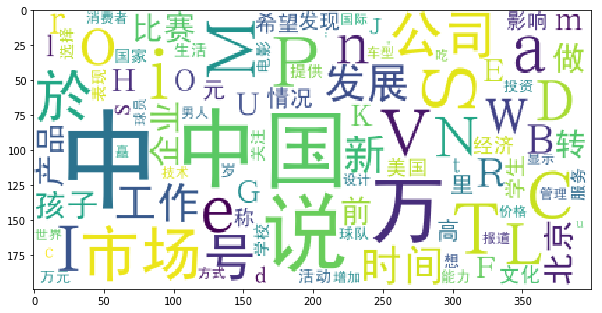

In [14]:
# 按照词频绘制云图
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
#matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
plt.figure(figsize=(10,8))
wordcloud=WordCloud(font_path="./data/simhei.ttf",background_color="white",max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_count.head(100).values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

###  TF-IDF ：提取关键词###

In [15]:
# 用jieba分词 提取前五个关键词
import jieba.analyse
index = 1000
print (df_news['content'][index])
content_S_str = "".join(content_S[index])  
print ("  ".join(jieba.analyse.extract_tags(content_S_str, topK=5, withWeight=False))) # jieba提取前五个关键词，jieba默认的使用tf-idf进行关键词提取

阿里巴巴集团昨日宣布，将在集团管理层面设立首席数据官岗位（Ｃｈｉｅｆ　Ｄａｔａ　Ｏｆｆｉｃｅｒ），阿里巴巴Ｂ２Ｂ公司ＣＥＯ陆兆禧将会出任上述职务，向集团ＣＥＯ马云直接汇报。＞菹ぃ和６月初的首席风险官职务任命相同，首席数据官亦为阿里巴巴集团在完成与雅虎股权谈判，推进“ｏｎｅ　ｃｏｍｐａｎｙ”目标后，在集团决策层面新增的管理岗位。０⒗锛团昨日表示，“变成一家真正意义上的数据公司”已是战略共识。记者刘夏
阿里巴巴  集团  首席  岗位  数据


In [25]:
# 查看关键词权重
jieba.analyse.extract_tags(content_S_str, topK=5, withWeight=True)

[('阿里巴巴', 0.4664850429155357),
 ('集团', 0.4400530776),
 ('首席', 0.36211245694446426),
 ('岗位', 0.28089986498035713),
 ('数据', 0.25614410777089286)]

###  LDA ：主题模型###
Latent Dirichlet Allocation  

(了解即可)
  
  LDA包含三部分：文档，主题、词  
   一篇文章包含多个主题
  LDA不需要准备label，把语料丢进去就能出结果

格式要求：list of list形式，分词好的的整个语料

In [17]:
from gensim import corpora, models, similarities
import gensim
#http://radimrehurek.com/gensim/

d:\python3.6.5\python36\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [72]:
# contents_clean[0]

In [19]:
# 做映射，相当于词袋，把词向量化
# 注意conten_clean为list of list格式，一篇文章分好词了是一个list，n篇文章组成一个大的list
dictionary = corpora.Dictionary(contents_clean)  
corpus = [dictionary.doc2bow(sentence) for sentence in contents_clean]

In [20]:
corpus[1]

[(199, 1),
 (200, 1),
 (201, 1),
 (202, 1),
 (203, 1),
 (204, 2),
 (205, 1),
 (206, 2),
 (207, 1),
 (208, 1),
 (209, 1),
 (210, 2),
 (211, 1),
 (212, 1),
 (213, 2),
 (214, 2),
 (215, 1)]

In [21]:
lda = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=20) #num_topics：主题个数，类似Kmeans自己指定K值

In [22]:
#一号分类结果：打印出第一个主题的前五个关键词
print (lda.print_topic(1, topn=5))

0.012*"电影" + 0.008*"中" + 0.006*"导演" + 0.004*"中国" + 0.004*"观众"


In [23]:
# 分别打印20个主题各自的前五个关键词
for topic in lda.print_topics(num_topics=20, num_words=5):
    print (topic)

(0, '0.007*"比赛" + 0.006*"ｏ" + 0.005*"中" + 0.004*"ｅ" + 0.004*"ｓ"')
(1, '0.012*"电影" + 0.008*"中" + 0.006*"导演" + 0.004*"中国" + 0.004*"观众"')
(2, '0.008*"说" + 0.005*"女人" + 0.004*"中" + 0.004*"做" + 0.003*"孩子"')
(3, '0.004*"李小璐" + 0.004*"官兵" + 0.004*"中" + 0.003*"部队" + 0.003*"说"')
(4, '0.011*"饰演" + 0.007*"中" + 0.005*"观众" + 0.003*"录制" + 0.003*"中国"')
(5, '0.005*"食物" + 0.005*"中" + 0.004*"吃" + 0.004*"Ｍ" + 0.004*"Ｓ"')
(6, '0.006*"中" + 0.004*"天籁" + 0.004*"恋情" + 0.003*"分手" + 0.003*"评委"')
(7, '0.006*"ａ" + 0.004*"ｉ" + 0.004*"ｏ" + 0.003*"考生" + 0.003*"中"')
(8, '0.012*"男人" + 0.007*"中" + 0.004*"说" + 0.004*"女人" + 0.003*"考生"')
(9, '0.006*"中国" + 0.004*"张绍" + 0.004*"Ｔ" + 0.004*"中" + 0.003*"Ｅ"')
(10, '0.007*"号" + 0.007*"万" + 0.004*"学生" + 0.003*"中" + 0.003*"转"')
(11, '0.007*"Ｍ" + 0.006*"Ｇ" + 0.005*"Ｐ" + 0.004*"中" + 0.004*"说"')
(12, '0.005*"中" + 0.004*"中国" + 0.003*"纹身" + 0.002*"ｅ" + 0.002*"眼线"')
(13, '0.004*"装扮" + 0.004*"万" + 0.003*"中" + 0.003*"Ｓ" + 0.003*"Ｖ"')
(14, '0.009*"音乐" + 0.006*"邱" + 0.005*"中" + 0.004*"演出" +

## 贝叶斯分类

In [66]:
df_train=pd.DataFrame({'contents_clean':contents_clean,'label':df_news['category']})
df_train.head()


,contents_clean,label
0,"[经销商, 电话, 试驾, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, 路, 号, 转, ...",汽车
1,"[呼叫, 热线, 服务, 邮箱, ｋ, ｆ, ｐ, ｅ, ｏ, ｐ, ｌ, ｅ, ｄ, ａ,...",汽车
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 二月, 公布, 最新, Ｍ, Ｉ, Ｎ, Ｉ, 新, 概念...",汽车
3,"[清仓, 甩卖, 一汽, 夏利, Ｎ, 威志, Ｖ, 低至, 万, 启新, 中国, 一汽, ...",汽车
4,"[日内瓦, 车展, 见到, 高尔夫, 家族, 新, 成员, 高尔夫, 敞篷版, 款, 全新,...",汽车


In [42]:
df_train.label.unique()

array(['汽车', '财经', '科技', '健康', '体育', '教育', '文化', '军事', '娱乐', '时尚'],
      dtype=object)

In [25]:
label_mapping = {"汽车": 1, "财经": 2, "科技": 3, "健康": 4, "体育":5, "教育": 6,"文化": 7,"军事": 8,"娱乐": 9,"时尚": 0}
df_train['label'] = df_train['label'].map(label_mapping)  # label：用数字替换类别
df_train.head()

,contents_clean,label
0,"[经销商, 电话, 试驾, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, 路, 号, 转, ...",1
1,"[呼叫, 热线, 服务, 邮箱, ｋ, ｆ, ｐ, ｅ, ｏ, ｐ, ｌ, ｅ, ｄ, ａ,...",1
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 二月, 公布, 最新, Ｍ, Ｉ, Ｎ, Ｉ, 新, 概念...",1
3,"[清仓, 甩卖, 一汽, 夏利, Ｎ, 威志, Ｖ, 低至, 万, 启新, 中国, 一汽, ...",1
4,"[日内瓦, 车展, 见到, 高尔夫, 家族, 新, 成员, 高尔夫, 敞篷版, 款, 全新,...",1


In [30]:
# 拆分训练集和测试集
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_train['contents_clean'].values, df_train['label'].values, random_state=1)

In [71]:
#x_train = x_train.flatten()
# x_train[1]

In [42]:
# 把list of list 转换为List，便于使用CountVectorizer做向量化
words = []
for line_index in range(len(x_train)):
    try:
        #x_train[line_index][word_index] = str(x_train[line_index][word_index])
        words.append(' '.join(x_train[line_index]))
    except:
        print (line_index,word_index)
words[:2]        

['中新网 上海 日电 于俊 父亲节 网络 吃 一顿 电影 快餐 微 电影 爸 对不起 我爱你 定于 本月 父亲节 当天 各大 视频 网站 首映 葜 谱 鞣 剑 保慈 障蚣 钦 呓 樯 埽 ⒌ 缬 埃 ǎ 停 椋 悖 颍 铩 妫 椋 恚 称 微型 电影 新 媒体 平台 播放 状态 短时 休闲 状态 观看 完整 策划 系统 制作 体系 支持 显示 较完整 故事情节 电影 微 超短 放映 微 周期 制作 天 数周 微 规模 投资 人民币 几千 数万元 每部 内容 融合 幽默 搞怪 时尚 潮流 人文 言情 公益 教育 商业 定制 主题 单独 成篇 系列 成剧 唇 开播 微 电影 爸 对不起 我爱你 讲述 一对 父子 观念 缺少 沟通 导致 关系 父亲 传统 固执 钟情 传统 生活 方式 儿子 新派 音乐 达 习惯 晚出 早 生活 性格 张扬 叛逆 两种 截然不同 生活 方式 理念 差异 一场 父子 间 拉开序幕 子 失手 打破 父亲 心爱 物品 父亲 赶出 家门 剧情 演绎 父亲节 妹妹 哥哥 化解 父亲 这场 矛盾 映逋坏 嚼 斫 狻 ⒍ 粤 ⒌ 桨容 争执 退让 传统 尴尬 父子 尴尬 情 男人 表达 心中 那份 感恩 一杯 滤挂 咖啡 父亲节 变得 温馨 镁 缬 缮 虾 Ｎ 逄 煳 幕 传播 迪欧 咖啡 联合 出品 出品人 希望 观摩 扪心自问 父亲节 父亲 记得 父亲 生日 哪一天 父亲 爱喝 跨出 家门 那一刻 感觉 一颗 颤动 心 操劳 天下 儿女 父亲节 大声 喊出 父亲 家人 爱 完',
 '中 报 发布 之际 多家 券商 上半年 银行 整体 利润 增速 下滑 概率 事件 国泰君安 报告 预计 各家 银行 适度 提拨 备 费用 平滑 利润 上半年 家 上市 银行 净利润 增 上半年 家 上市 银行 净利润 平均 增幅 中信 建投 证券 银行业 分析师 杨荣 媒体 中国 银行业 面对 三个 转折点 盈利 转折点 资产 质量 转折点 业务 经营 模式 转折点 率 市场化 存贷款 利差 缩窄 挤压 银行 利润 银行 业内人士 坦言 上半年 银行 收益 影响 实体 经济 下滑 带来 企业 信贷 需求 下降 Ｒ 患倚 ⌒ 凸煞 葜 埔 行 分行 信贷 负责人 长期 合作 国有企业 减少 贷款额度 经营 计划 小企业 贷款 到期 无力 续约 预计 分行 上半年 新增 

In [33]:
print (len(words))

3750


词向量化小例子，注意：输入数据格式

In [34]:
# 向量化
from sklearn.feature_extraction.text import CountVectorizer
texts=["dog cat fish","dog cat cat","fish bird", 'bird']  # 输入格式是list
cv = CountVectorizer()
cv_fit=cv.fit_transform(texts)

print(cv.get_feature_names())
print(cv_fit.toarray())


print(cv_fit.toarray().sum(axis=0))

['bird', 'cat', 'dog', 'fish']
[[0 1 1 1]
 [0 2 1 0]
 [1 0 0 1]
 [1 0 0 0]]
[2 3 2 2]


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
texts=["dog cat fish","dog cat cat","fish bird", 'bird']
# 设定一或者两个词
cv = CountVectorizer(ngram_range=(1,2))  
cv_fit=cv.fit_transform(texts)

print(cv.get_feature_names())
print(cv_fit.toarray())

print(cv_fit.toarray().sum(axis=0))

['bird', 'cat', 'cat cat', 'cat fish', 'dog', 'dog cat', 'fish', 'fish bird']
[[0 1 0 1 1 1 1 0]
 [0 2 1 0 1 1 0 0]
 [1 0 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0]]
[2 3 1 1 2 2 2 1]


用词频统计构造词向量模型，把特征转为向量

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(analyzer='word', max_features=4000,  lowercase = False)
vec.fit(words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=4000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [70]:
# print(vec.get_feature_names())
# print(vec.transform(words).toarray())

In [41]:
type(words)

list

In [69]:
Train = vec.transform(words)
Train.toarray()[:5,:4]

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int64)

建立多项式朴素贝叶斯模型，并训练

In [38]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(vec.transform(words), y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

对贝叶斯模型进行测试

In [39]:
# 对测试集进行处理
test_words = []
for line_index in range(len(x_test)):
    try:
        #x_train[line_index][word_index] = str(x_train[line_index][word_index])
        test_words.append(' '.join(x_test[line_index]))
    except:
         print (line_index,word_index)
test_words[0]

'国家 公务员 考试 申论 应用文 类 试题 实质 一道 集 概括 分析 提出 解决问题 一体 综合性 试题 说 一道 客观 凝练 申发 论述 文章 题目 分析 历年 国考 申论 真题 公文 类 试题 类型 多样 包括 公文 类 事务性 文书 类 题材 从题 干 作答 材料 内容 整合 分析 无需 太 创造性 发挥 纵观 历年 申论 真题 作答 应用文 类 试题 文种 格式 作出 特别 重在 内容 考查 行文 格式 考生 平常心 面对 应用文 类 试题 准确 把握 作答 领会 内在 含义 把握 题材 主旨 材料 结构 轻松 应对 应用文 类 试题 Ｒ 弧 ⒆ 钒 盐 展文 写作 原则 Ｔ 材料 中来 应用文 类 试题 材料 总体 把握 客观 考生 材料 中来 材料 中 把握 材料 准确 理解 题材 主旨 Ｔ 政府 角度 作答 应用文 类 试题 更应 注重 政府 角度 观点 政府 角度 出发 原则 表述 观点 提出 解决 之策 考生 作答 站 政府 人员 角度 看待 提出 解决问题 Ｔ 文体 结构 形式 考查 重点 文体 结构 大部分 评分 关键点 解答 方法 薄 ⒆ ス 丶 词 明 方向 作答 题目 题干 作答 作答 方向 作答 角度 关键 向导 考生 仔细阅读 题干 作答 抓住 关键词 作答 方向 相关 要点 整理 作答 思路 年国考 地市级 真 题为 例 潦惺姓 府 宣传 推进 近海 水域 污染 整治 工作 请 给定 资料 市政府 工作人员 身份 草拟 一份 宣传 纲要 Ｒ 求 保对 宣传 内容 要点 提纲挈领 陈述 玻 体现 政府 精神 全市 各界 关心 支持 污染 整治 工作 通俗易懂 超过 字 肮 丶 词 近海 水域 污染 整治 工作 市政府 工作人员 身份 宣传 纲要 提纲挈领 陈述 体现 政府 精神 全市 各界 关心 支持 污染 整治 工作 通俗易懂 提示 归结 作答 要点 包括 污染 情况 原因 解决 对策 作答 思路 情况 原因 对策 意义 逻辑 顺序 安排 文章 结构 病 ⒋ 缶殖 龇 ⅲ 明 结构 解答 应用文 类 试题 考生 材料 整体 出发 大局 出发 高屋建瓴 把握 材料 主题 思想 事件 起因 解决 对策 阅读文章 构建 文章 结构 直至 快速 解答 场 ⒗ 硭 乘悸 罚明 逻辑 应用文 类 试题 严密 逻辑思维 情况 原因 对策 意义

In [55]:
classifier.score(vec.transform(test_words), y_test)

0.804

用tf-idf做词向量

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word', max_features=4000,  lowercase = False)
vectorizer.fit(words)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=4000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [62]:
xx_Train = vectorizer.transform(words)
xx_Train.shape

(3750, 4000)

In [50]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(vectorizer.transform(words), y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [51]:
classifier.score(vectorizer.transform(test_words), y_test)

0.8152

可见：TF-IDF效果比单纯词频形式向量化要好一些

#### 项目总结
- 1、获取新闻分类的历史数据
- 2、对新闻文本信息进行文本处理
- 3、使用jieba分词对文本进分词
- 4、去掉通用词
- 5、词平向量和
- 6、切割测试集与训练集
- 7、使用多项式贝叶斯进行模型学习
- 8、调用测试集评估模型